
# Week 1 Lab – Part 2: Multiple Features and Polynomial Regression (House Prices)

In this second part of the lab we will extend linear regression from **one feature** to **multiple features**, and then to **polynomial regression**, using **house prices** as a running example.

We keep the same notation as in class:

- The $i$-th training example is $(x^{(i)}, y^{(i)})$.
- Each input $x^{(i)}$ has $n$ features: 
  $$
  x^{(i)} = \big[x_1^{(i)}, x_2^{(i)}, \dots, x_n^{(i)}\big].
  $$
- The model (hypothesis) is a function $f_{w,b}(x)$ that depends on parameters $w$ and $b$:
  $$
  f_{w,b}(x) = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b.
  $$


## 0.1 Linear Regression with Multiple Features

For one feature we had
$$
f_{w,b}(x) = wx + b.
$$

For **multiple features**, with $\vec{x} \in \mathbb{R}^n$ and $\vec{w} \in \mathbb{R}^n$, we write
$$
f_{\vec{w}, b}(\vec{x}) = \sum_{j=1}^{n} w_j x_j + b.
$$

In **vector notation** this becomes
$$
f_{\vec{w}, b}(\vec{x}) = \vec{w}^T \vec{x} + b.
$$

For a whole dataset with $m$ examples, we collect the inputs into a **design matrix** $\mathbf{X} \in \mathbb{R}^{m \times n}$:
- Row $i$ of $\mathbf{X}$ is $(x_1^{(i)}, \dots, x_n^{(i)})$.
- The target vector is $\vec{y} \in \mathbb{R}^m$, with entries $y^{(i)}$.

Then the predictions for all examples at once are
$$
\hat{\vec{y}} = \mathbf{X} \vec{w} + b \,\vec{1},
$$
where $\vec{1}$ is the vector of all ones (size $m$).


## 0.2 Cost Function for Multiple Features

The cost function is the same **mean squared error** we used before, now written for the multivariate case:

$$
J(\vec{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \right)^2.
$$


## 0.3 Gradient Descent for Multiple Features

The partial derivatives of $J(\vec{w}, b)$ are:

- For each $w_j$:
  $$
  \frac{\partial J(\vec{w}, b)}{\partial w_j} 
  = \frac{1}{m} \sum_{i=1}^{m} \big( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \big)\, x_j^{(i)}.
  $$

- For the bias term $b$:
  $$
  \frac{\partial J(\vec{w}, b)}{\partial b} 
  = \frac{1}{m} \sum_{i=1}^{m} \big( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \big).
  $$

In **vector/matrix form**, let
- $\hat{\vec{y}} = f_{\vec{w}, b}(\mathbf{X})$ (the vector of predictions),
- $\vec{e} = \hat{\vec{y}} - \vec{y}$ (the error vector).

Then:
$$
\nabla_{\vec{w}} J(\vec{w}, b) 
= \frac{1}{m} \,\mathbf{X}^T \vec{e},
\qquad
\frac{\partial J(\vec{w}, b)}{\partial b}
= \frac{1}{m} \sum_{i=1}^{m} e^{(i)}.
$$

The gradient descent updates are:
$$
\vec{w} := \vec{w} - \alpha \, \nabla_{\vec{w}} J(\vec{w}, b),
\qquad
b := b - \alpha \, \frac{\partial J(\vec{w}, b)}{\partial b},
$$
where $\alpha$ is the learning rate.


## 1. Setup

In [1]:

# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=4, suppress=True)



## 2. Dataset 


In [6]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])

L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])

### 2.1 Visualize Of the relation

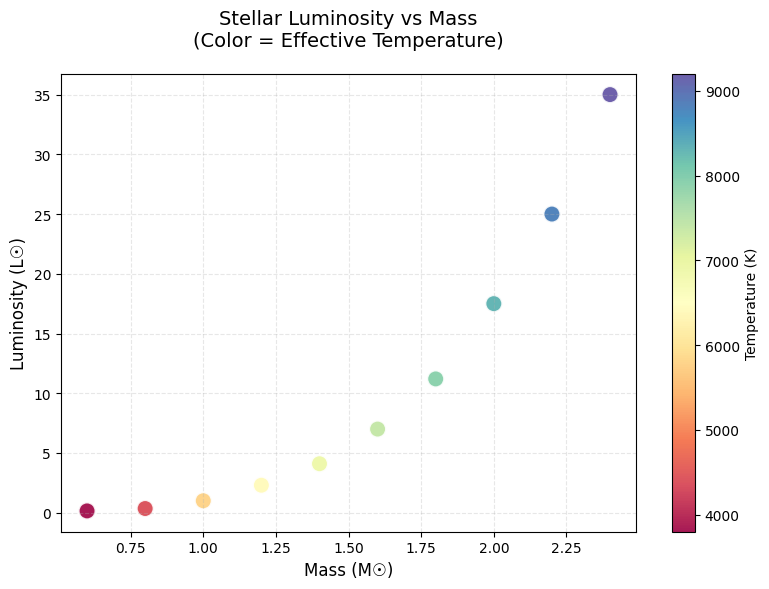

In [15]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(M, L, c=T, cmap="Spectral", s=150, edgecolors="white", linewidth=1.5, alpha=0.9, marker="o")
plt.colorbar(sc, label="Temperature (K)")
plt.xlabel("Mass (M☉)", fontsize=12)
plt.ylabel("Luminosity (L☉)", fontsize=12)
plt.title("Stellar Luminosity vs Mass\n(Color = Effective Temperature)", fontsize=14, pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 2.2 Feature engeerienring

In [47]:
sample_count = len(M)

# Feature engineering
mass_squared = M ** 2
mass_temp_product = M * T
log_mass = np.log10(M)
log_luminosity = np.log10(L)
temp_squared = T ** 2
luminosity_mass_ratio = L / M
mass_log_temp = M * np.log10(T)

# Design matrix with engineered features
feature_matrix = np.column_stack([
    M,                        # Original stellar mass
    T,                        # Original temperature  
    mass_squared,             # Mass squared term
    mass_temp_product,        # Mass-temperature interaction
    log_mass,                 # Logarithm of mass
    temp_squared,             # Temperature squared
    luminosity_mass_ratio,    # Luminosity to mass ratio
    mass_log_temp             # Mass × log10(Temperature)
])

# Display
print("Design Matrix (first 3 samples):")
print("Feature names: [M, T, M², M×T, log10(M), T², L/M, M×log10(T)]")
print(feature_matrix[:3])
print(f"\nTarget values (first 3): {L[:3]}")
print(f"Matrix shape: {feature_matrix.shape}")
print(f"Number of samples: {sample_count}")
print(f"Number of features: {feature_matrix.shape[1]}")

Design Matrix (first 3 samples):
Feature names: [M, T, M², M×T, log10(M), T², L/M, M×log10(T)]
[[       0.6        3800.            0.36       2280.           -0.2218
  14440000.            0.25          2.1479]
 [       0.8        4400.            0.64       3520.           -0.0969
  19360000.            0.4375        2.9148]
 [       1.         5800.            1.         5800.            0.
  33640000.            1.            3.7634]]

Target values (first 3): [0.15 0.35 1.  ]
Matrix shape: (10, 8)
Number of samples: 10
Number of features: 8



## 3. Vectorized gradients and loss

We now implement the model and cost function using **NumPy arrays** and **vectorized operations**.

### 3.1 Hypothesis $f_{w,b}(x)$

For a dataset with matrix $X$ and parameters $w$ and $b$, the vector of predictions is:
$$
\hat{y} = X w + b.
$$


In [42]:

def predict(X, w, b):
    """Compute predictions f_{w,b}(x) for all examples.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
        Design matrix: each row is x^(i).
    w : np.ndarray, shape (n,)
        Parameter vector.
    b : float
        Bias term.

    Returns
    -------
    y_hat : np.ndarray, shape (m,)
        Vector of predictions for each example.
    """
    return X @ w + b  # vectorized: matrix-vector product + scalar



### 3.2 Cost Function $J(w,b)$ (Vectorized)

We recall
$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)^2.
$$

In vector form, if we define the error vector $e = \hat{y} - y$, then
$$
J(w,b) = \frac{1}{2m} e^T e.
$$


In [48]:

def compute_cost(X, L, w, b):
    """Compute the cost J(w,b) for linear regression with multiple features.

    Uses the vectorized formula:
        J = (1 / (2m)) * (y_hat - y)^T (y_hat - y)

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w : np.ndarray, shape (n,)
    b : float

    Returns
    -------
    cost : float
    """
    m = X.shape[0]
    L_hat = predict(X, w, b)
    error = L_hat - L
    cost = (error @ error) / (2 * m)
    return cost

# Test with w = 0, b = 0
n = X.shape[1]
w_test = np.zeros(n)
b_test = 0.0
print("Cost with w=0, b=0:", compute_cost(X, L, w_test, b_test))


Cost with w=0, b=0: 117.69675



## 4. Gradient of the Cost Function (Vectorized)

We derived:
$$
\nabla_w J(w,b) = \frac{1}{m} X^T (\hat{y} - y), \qquad
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}).
$$

We now implement this directly in NumPy.


In [49]:

def compute_gradient(X, L, w, b):
    """Compute the gradients of J with respect to w and b.

    Vectorized formulas:
        dj_dw = (1/m) * X^T (y_hat - y)
        dj_db = (1/m) * sum(y_hat - y)
    """
    m = X.shape[0]
    L_hat = predict(X, w, b)
    error = L_hat - L

    dj_dw = (X.T @ error) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradient(X, L, w_test, b_test)
print("Gradient at w=0, b=0:")
print("dj_dw:", dj_dw_test)
print("dj_db:", dj_db_test)


Gradient at w=0, b=0:
dj_dw: [    -21.523   -87845.         -45.9434 -185408.8   ]
dj_db: -10.36



## 5. Gradient descent + convergence
## Gradient Descent for Multiple Features
We now put everything together into a gradient descent loop.

At each iteration:
1. Compute $\hat{y} = f_{w,b}(X)$.
2. Compute the gradients $\nabla_w J$ and $\partial J / \partial b$.
3. Update
   $$
   w := w - \alpha \nabla_w J, \qquad
   b := b - \alpha \frac{\partial J}{\partial b}.
   $$


In [50]:

def gradient_descent(X, L, w_init, b_init, alpha, num_iterations):
    """Run gradient descent to learn w and b.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w_init : np.ndarray, shape (n,)
    b_init : float
    alpha : float
        Learning rate.
    num_iterations : int

    Returns
    -------
    w : np.ndarray, shape (n,)
    b : float
    history_it : list of int
    history_cost : list of float
    """
    w = w_init.copy()
    b = b_init
    history_it = []
    history_cost = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 10 == 0 or i == num_iterations - 1:
            cost = compute_cost(X, L, w, b)
            history_it.append(i)
            history_cost.append(cost)
            print(f"Iteration {i:4d}: cost = {cost:8.4f}")

    return w, b, history_it, history_cost

alpha = 1e-9
num_iterations = 2000
w_init = np.zeros(n)
b_init = 0.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


Iteration    0: cost =  80.1334
Iteration   10: cost =  19.7645
Iteration   20: cost =  18.3887
Iteration   30: cost =  17.5240
Iteration   40: cost =  16.7139
Iteration   50: cost =  15.9520
Iteration   60: cost =  15.2354
Iteration   70: cost =  14.5613
Iteration   80: cost =  13.9273
Iteration   90: cost =  13.3310
Iteration  100: cost =  12.7700
Iteration  110: cost =  12.2424
Iteration  120: cost =  11.7462
Iteration  130: cost =  11.2794
Iteration  140: cost =  10.8403
Iteration  150: cost =  10.4274
Iteration  160: cost =  10.0389
Iteration  170: cost =   9.6736
Iteration  180: cost =   9.3299
Iteration  190: cost =   9.0067
Iteration  200: cost =   8.7026
Iteration  210: cost =   8.4166
Iteration  220: cost =   8.1476
Iteration  230: cost =   7.8946
Iteration  240: cost =   7.6567
Iteration  250: cost =   7.4328
Iteration  260: cost =   7.2223
Iteration  270: cost =   7.0242
Iteration  280: cost =   6.8380
Iteration  290: cost =   6.6627
Iteration  300: cost =   6.4979
Iteratio

### 5.1 Plot the Cost over Iterations

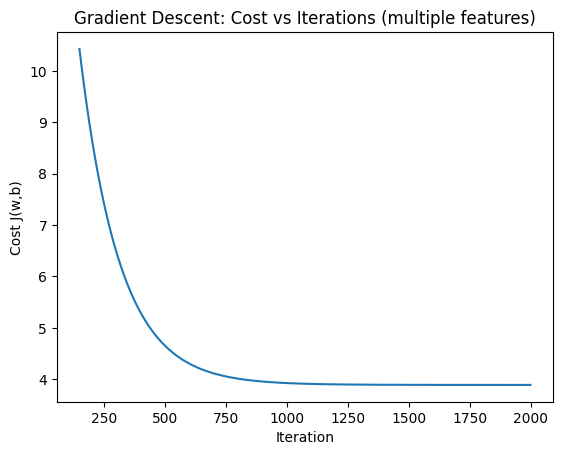

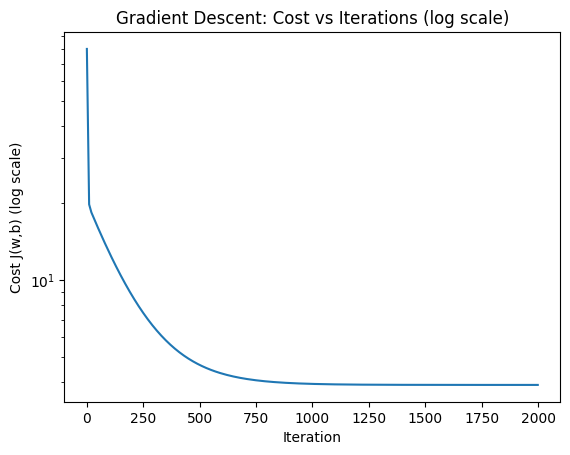

In [51]:

plt.figure()
plt.plot(it_hist[15:], cost_hist[15:])
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations (multiple features)")
plt.show()

plt.figure()
plt.semilogy(it_hist, cost_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b) (log scale)")
plt.title("Gradient Descent: Cost vs Iterations (log scale)")
plt.show()


## 6. Feature Selection

### M1: X = [M, T]

In [54]:
stellar_features = np.column_stack([M, T])
learning_rate = 1e-9
max_iterations = 1000
initial_weights = np.zeros(stellar_features.shape[1])
initial_bias = 0.0

optimal_weights, optimal_bias, iteration_history, loss_history = gradient_descent(
    stellar_features, L, initial_weights, initial_bias, learning_rate, max_iterations
)

print("\nLearned parameters (M1):")
print("w =", optimal_weights)
print("b =", optimal_bias)

final_loss = compute_cost(stellar_features, L, optimal_weights, optimal_bias)
print("Total Loss (M1): ", final_loss)

Iteration    0: cost = 110.1745
Iteration   10: cost =  65.6884
Iteration   20: cost =  49.8795
Iteration   30: cost =  44.2615
Iteration   40: cost =  42.2651
Iteration   50: cost =  41.5556
Iteration   60: cost =  41.3035
Iteration   70: cost =  41.2139
Iteration   80: cost =  41.1821
Iteration   90: cost =  41.1708
Iteration  100: cost =  41.1667
Iteration  110: cost =  41.1653
Iteration  120: cost =  41.1648
Iteration  130: cost =  41.1646
Iteration  140: cost =  41.1646
Iteration  150: cost =  41.1645
Iteration  160: cost =  41.1645
Iteration  170: cost =  41.1645
Iteration  180: cost =  41.1645
Iteration  190: cost =  41.1645
Iteration  200: cost =  41.1645
Iteration  210: cost =  41.1645
Iteration  220: cost =  41.1645
Iteration  230: cost =  41.1645
Iteration  240: cost =  41.1645
Iteration  250: cost =  41.1645
Iteration  260: cost =  41.1645
Iteration  270: cost =  41.1645
Iteration  280: cost =  41.1645
Iteration  290: cost =  41.1645
Iteration  300: cost =  41.1645
Iteratio

### Predicted vs Actual  M1

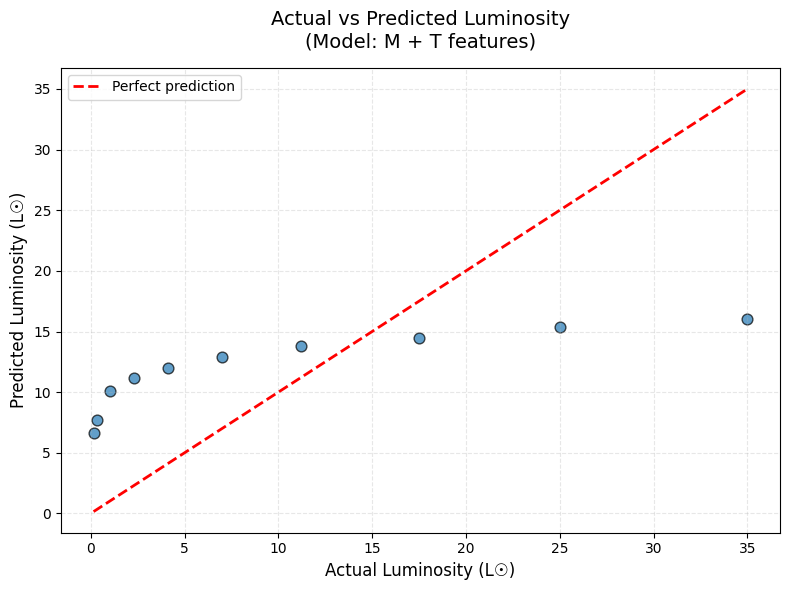

In [ ]:
predicted_luminosity = predict(stellar_features, optimal_weights, optimal_bias)

plt.figure(figsize=(8, 6))
plt.scatter(L, predicted_luminosity, alpha=0.7, edgecolors='k', s=60)
plt.xlabel("Actual Luminosity (L☉)", fontsize=12)
plt.ylabel("Predicted Luminosity (L☉)", fontsize=12)
plt.title("Actual vs Predicted Luminosity\n(Model: M + T features)", fontsize=14, pad=15)

min_val = min(L.min(), predicted_luminosity.min())
max_val = max(L.max(), predicted_luminosity.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect prediction')

plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

### M2: X = [M, T, M^2]

In [57]:
stellar_features = np.column_stack([M, T, M**2])
learning_rate = 1e-9
max_iterations = 1000
initial_weights = np.zeros(stellar_features.shape[1])
initial_bias = 0.0

optimal_weights, optimal_bias, iteration_history, loss_history = gradient_descent(
    stellar_features, L, initial_weights, initial_bias, learning_rate, max_iterations
)

print("\nLearned parameters (M2):")
print("w =", optimal_weights)
print("b =", optimal_bias)

final_loss = compute_cost(stellar_features, L, optimal_weights, optimal_bias)
print("Total Loss (M2): ", final_loss)

Iteration    0: cost = 110.1745
Iteration   10: cost =  65.6884
Iteration   20: cost =  49.8795
Iteration   30: cost =  44.2615
Iteration   40: cost =  42.2651
Iteration   50: cost =  41.5556
Iteration   60: cost =  41.3035
Iteration   70: cost =  41.2139
Iteration   80: cost =  41.1821
Iteration   90: cost =  41.1707
Iteration  100: cost =  41.1667
Iteration  110: cost =  41.1653
Iteration  120: cost =  41.1648
Iteration  130: cost =  41.1646
Iteration  140: cost =  41.1645
Iteration  150: cost =  41.1645
Iteration  160: cost =  41.1645
Iteration  170: cost =  41.1645
Iteration  180: cost =  41.1645
Iteration  190: cost =  41.1645
Iteration  200: cost =  41.1645
Iteration  210: cost =  41.1645
Iteration  220: cost =  41.1645
Iteration  230: cost =  41.1645
Iteration  240: cost =  41.1645
Iteration  250: cost =  41.1645
Iteration  260: cost =  41.1645
Iteration  270: cost =  41.1645
Iteration  280: cost =  41.1645
Iteration  290: cost =  41.1645
Iteration  300: cost =  41.1645
Iteratio

### Predicted vs Actual M2

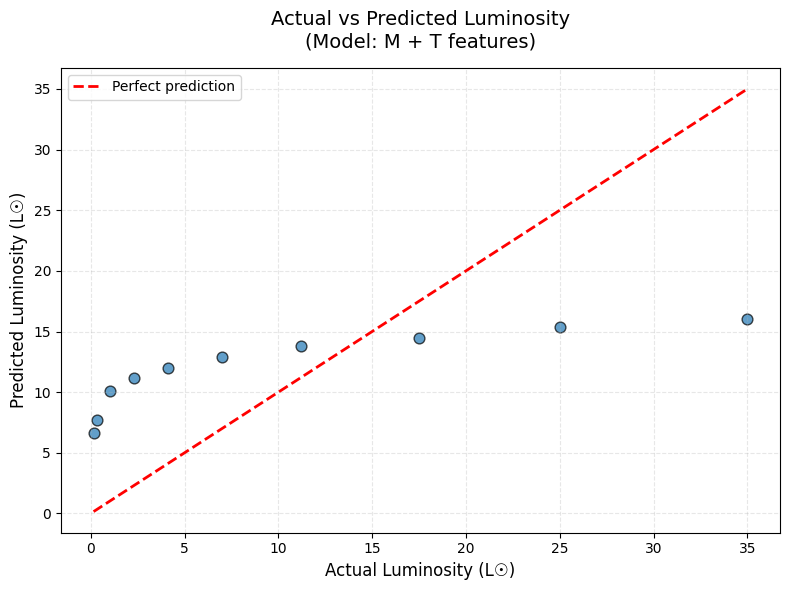

In [60]:
predicted_luminosity = predict(stellar_features, optimal_weights, optimal_bias)

plt.figure(figsize=(8, 6))
plt.scatter(L, predicted_luminosity, alpha=0.7, edgecolors='k', s=60)
plt.xlabel("Actual Luminosity (L☉)", fontsize=12)
plt.ylabel("Predicted Luminosity (L☉)", fontsize=12)
plt.title("Actual vs Predicted Luminosity\n(Model: M + T features)", fontsize=14, pad=15)

min_val = min(L.min(), predicted_luminosity.min())
max_val = max(L.max(), predicted_luminosity.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect prediction')

plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

### M3: X = [M, T, M^2, M*T]

In [61]:
stellar_features = np.column_stack([M, T, M**2,M*T])
learning_rate = 1e-9
max_iterations = 1000
initial_weights = np.zeros(stellar_features.shape[1])
initial_bias = 0.0

optimal_weights, optimal_bias, iteration_history, loss_history = gradient_descent(
    stellar_features, L, initial_weights, initial_bias, learning_rate, max_iterations
)

print("\nLearned parameters (M2):")
print("w =", optimal_weights)
print("b =", optimal_bias)

final_loss = compute_cost(stellar_features, L, optimal_weights, optimal_bias)
print("Total Loss (M2): ", final_loss)

Iteration    0: cost =  80.1334
Iteration   10: cost =  19.7645
Iteration   20: cost =  18.3887
Iteration   30: cost =  17.5240
Iteration   40: cost =  16.7139
Iteration   50: cost =  15.9520
Iteration   60: cost =  15.2354
Iteration   70: cost =  14.5613
Iteration   80: cost =  13.9273
Iteration   90: cost =  13.3310
Iteration  100: cost =  12.7700
Iteration  110: cost =  12.2424
Iteration  120: cost =  11.7462
Iteration  130: cost =  11.2794
Iteration  140: cost =  10.8403
Iteration  150: cost =  10.4274
Iteration  160: cost =  10.0389
Iteration  170: cost =   9.6736
Iteration  180: cost =   9.3299
Iteration  190: cost =   9.0067
Iteration  200: cost =   8.7026
Iteration  210: cost =   8.4166
Iteration  220: cost =   8.1476
Iteration  230: cost =   7.8946
Iteration  240: cost =   7.6567
Iteration  250: cost =   7.4328
Iteration  260: cost =   7.2223
Iteration  270: cost =   7.0242
Iteration  280: cost =   6.8380
Iteration  290: cost =   6.6627
Iteration  300: cost =   6.4979
Iteratio

### Predicted vs Actual 3

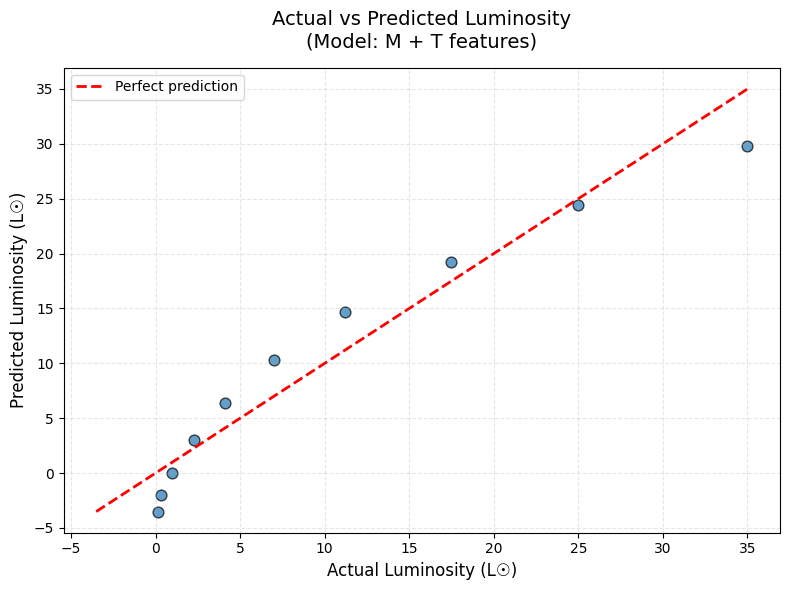

In [62]:
predicted_luminosity = predict(stellar_features, optimal_weights, optimal_bias)

plt.figure(figsize=(8, 6))
plt.scatter(L, predicted_luminosity, alpha=0.7, edgecolors='k', s=60)
plt.xlabel("Actual Luminosity (L☉)", fontsize=12)
plt.ylabel("Predicted Luminosity (L☉)", fontsize=12)
plt.title("Actual vs Predicted Luminosity\n(Model: M + T features)", fontsize=14, pad=15)

min_val = min(L.min(), predicted_luminosity.min())
max_val = max(L.max(), predicted_luminosity.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect prediction')

plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

### 7 Cost vs interaction

###              For the full model of M3

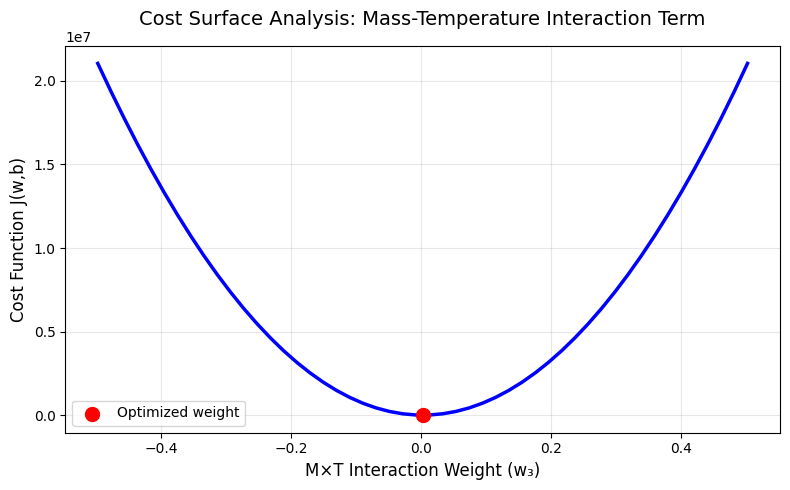

In [63]:
sample_count = stellar_features.shape[0]
interaction_weight = optimal_weights[3]
weight_range = np.linspace(interaction_weight - 0.5, interaction_weight + 0.5, 50)

weight_matrix = np.tile(optimal_weights, (weight_range.size, 1))
weight_matrix[:, 3] = weight_range

predictions = stellar_features @ weight_matrix.T + optimal_bias
residuals = predictions - L.reshape(-1, 1)
cost_values = np.sum(residuals ** 2, axis=0) / (2 * sample_count)

plt.figure(figsize=(8, 5))
plt.plot(weight_range, cost_values, 'b-', linewidth=2.5)
plt.scatter([interaction_weight], [final_loss], color='red', s=100, zorder=5, label='Optimized weight')
plt.xlabel("M×T Interaction Weight (w₃)", fontsize=12)
plt.ylabel("Cost Function J(w,b)", fontsize=12)
plt.title("Cost Surface Analysis: Mass-Temperature Interaction Term", fontsize=14, pad=15)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### 8. Inference Demo

### predict luminosity for a new star (e.g., M=1.3, T=6600)

In [64]:
new_star_mass = np.array([1.3])
new_star_temp = np.array([6600])

mass_squared_new = new_star_mass ** 2
mass_temp_interaction_new = new_star_mass * new_star_temp

new_star_features = np.column_stack([
    new_star_mass, 
    new_star_temp, 
    mass_squared_new, 
    mass_temp_interaction_new
])

predicted_luminosity = predict(new_star_features, optimal_weights, optimal_bias)

print("\nNew Star Characteristics:")
print(f"Mass: {new_star_mass[0]} M☉")
print(f"Temperature: {new_star_temp[0]:,} K")
print(f"Mass²: {mass_squared_new[0]:.2f} M☉²")
print(f"M×T: {mass_temp_interaction_new[0]:,.0f} M☉·K")

print(f"\nPredicted Luminosity: {predicted_luminosity[0]:.2f} L☉")


New Star Characteristics:
Mass: 1.3 M☉
Temperature: 6,600 K
Mass²: 1.69 M☉²
M×T: 8,580 M☉·K

Predicted Luminosity: 4.60 L☉


### Comment on reasonableness.